# Point Cloud Preprocessing

Through her thesis "3D Generative Adversarial Networks to Autonomously Generate Building Geometry", Lisa-Marie Mueller researched how Generative Adversarial Networks can be used to produce building geometry. This required a data set and some pre-processing. BuildingNet v0.1 (Pratheba, et al.) is a data set released in 2021 which consists of 1,938 buildings with consistently labeled exteriors. This is the data set that was used as a basis for the thesis. A number of steps were taken to modify the existing data set so that the data aligns with the needs of generative deep learning tasks which is explained further in Chapter 5 of the Thesis report. First, models that had too many incorrect labels or not enough labels were removed from the data set. Next, only model that contained points labeld as 'door', 'window', 'wall', and 'roof' were kept. Finally, only buildings of type 'house' or 'villa' were selected. These models were then pre-processed to remove site geometry and unnecessary labels. These preprocessing steps are demonstrated in this notebook. 

Before running the notebook, please ensure you have the correct libraries installed in your conda enviornment and that you activated this environment. An env file is included on GitHub.

Pratheba Selvaraju, Mohamed Nabail, Marios Loizou, Maria Maslioukova, Melinos Averkiou, Andreas Andreou, Siddhartha Chaudhuri, Evangelos Kalogerakis, "BuildingNet: Learning to Label 3D Buildings", Proceedings of the IEEE/CVF International Conference on Computer Vision (ICCV), 2021. https://buildingnet.org/

In [1]:
#imports and initialize variables
import utilities.preprocessing as preprocess
import open3d as o3d
import os
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from PIL import ImageDraw
from IPython.display import display

file_path = 'sample_files/pointclouds/original'
save_location = 'sample_files/pointclouds/clean'

image_path_orig = 'sample_files/pointclouds/images_original'
image_path_clean = 'sample_files/pointclouds/images_clean'

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
#load pointclouds
all_files = [f for f in os.listdir(file_path) if os.path.isfile(os.path.join(file_path, f))]

for file in all_files:
    if file.endswith('.ply'):
        _, name, pcd, _, _ = preprocess.load_point_cloud_file(file_path, file)
        name = file.replace('.ply','')

        vis = o3d.visualization.Visualizer()
        vis.create_window(window_name=name, width=1000, height=1000)
        vis.add_geometry(pcd)

        image = vis.capture_screen_float_buffer(True)
        path = image_path_orig + "/"
        filename = path + name + ".png"
        print(filename)

        plt.imsave(filename, np.asarray(image), format = 'png', dpi = 150)
        plt.clf()

        vis.destroy_window()

sample_files/pointclouds/images_original/COMMERCIALhouse_mesh2682.png
sample_files/pointclouds/images_original/RESIDENTIALhouse_mesh8157.png
sample_files/pointclouds/images_original/RESIDENTIALhouse_mesh8494.png
sample_files/pointclouds/images_original/RESIDENTIALhouse_mesh8596.png


<Figure size 640x480 with 0 Axes>

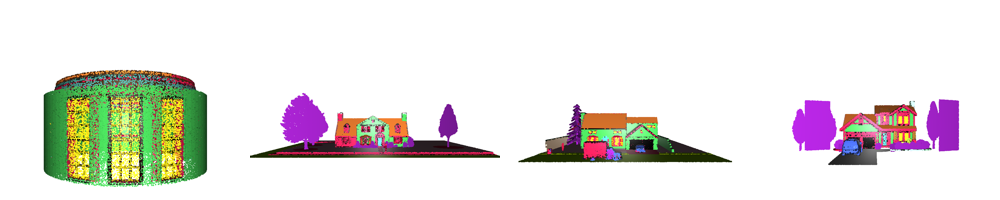

In [3]:
#show saved images of point clouds
images = []
all_files = [f for f in os.listdir(image_path_orig) if os.path.isfile(os.path.join(image_path_orig, f))]

images = [Image.open(image_path_orig + '/' + x) for x in all_files]

new_im = Image.new('RGB', (1000, 200), (255, 255, 255))

for i, im in enumerate(images):
    width, height = im.size
    target_width = 250 #px
    ratio = width / target_width
    new_height = int(height // ratio)

    im_resized = im.resize((target_width, new_height))
    
    new_im.paste(im_resized, (im_resized.size[0] * i, 0))

display(new_im)

In [4]:
#clean and scale points cloud
preprocess.clean_point_clouds(file_path, save_location)

#save images of cleaned pointclouds
all_files = [f for f in os.listdir(save_location) if os.path.isfile(os.path.join(save_location, f))]

for file in all_files:
    if file.endswith('.ply'):
        _, name, pcd, _, _ = preprocess.load_point_cloud_file(save_location, file)
        name = file.replace('.ply','')

        vis = o3d.visualization.Visualizer()
        vis.create_window(window_name=name, width=1000, height=1000)
        vis.add_geometry(pcd)

        image = vis.capture_screen_float_buffer(True)
        path = image_path_clean + "/"
        filename = path + name + ".png"
        print(filename)

        plt.imsave(filename, np.asarray(image), format = 'png', dpi = 150)
        plt.clf()

        vis.destroy_window()

Cleaned 8 files.
sample_files/pointclouds/images_clean/COMMERCIALhouse_mesh2682.png
sample_files/pointclouds/images_clean/RESIDENTIALhouse_mesh8157.png
sample_files/pointclouds/images_clean/RESIDENTIALhouse_mesh8494.png
sample_files/pointclouds/images_clean/RESIDENTIALhouse_mesh8596.png


<Figure size 640x480 with 0 Axes>

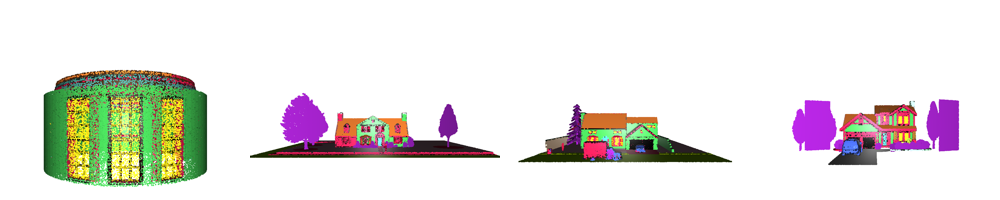

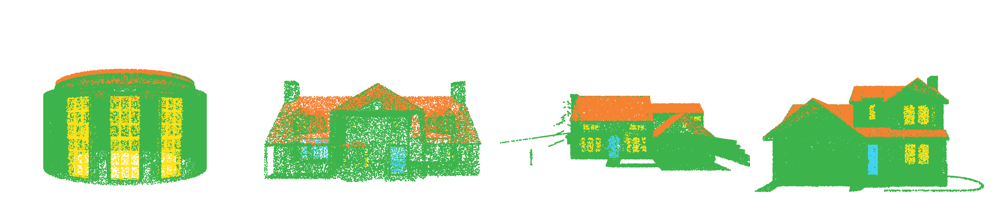

In [5]:
#show saved images of cleaned point clouds
images = []
all_files = [f for f in os.listdir(image_path_clean) if os.path.isfile(os.path.join(image_path_clean, f))]

images = [Image.open(image_path_clean + '/' + x) for x in all_files]

new_im_clean = Image.new('RGB', (1000, 200), (255, 255, 255))

for i, im in enumerate(images):
    width, height = im.size
    target_width = 250 #px
    ratio = width / target_width
    new_height = int(height // ratio)

    im_resized = im.resize((target_width, new_height))
    
    new_im_clean.paste(im_resized, (im_resized.size[0] * i, 0))
    
display(new_im)
display(new_im_clean)